# Serialized DLA Sandbox Notebook

## Preliminary Code to Run

In [1]:
using Plots
using BenchmarkTools
using DelimitedFiles
using Distributions
using GLM
using DataFrames
using Polynomials

include("serialized_dla_modules.jl")
include("time_complexity_module.jl")

Main.time_complexity

## Sample DLA Plots

#### Initial State of Walkers

Note that due to the `floor` function operated on the x and y component of the particle's initial positionsm the possible initial states are not centered at 0, 0, and are shifted instead towards the -x direction.

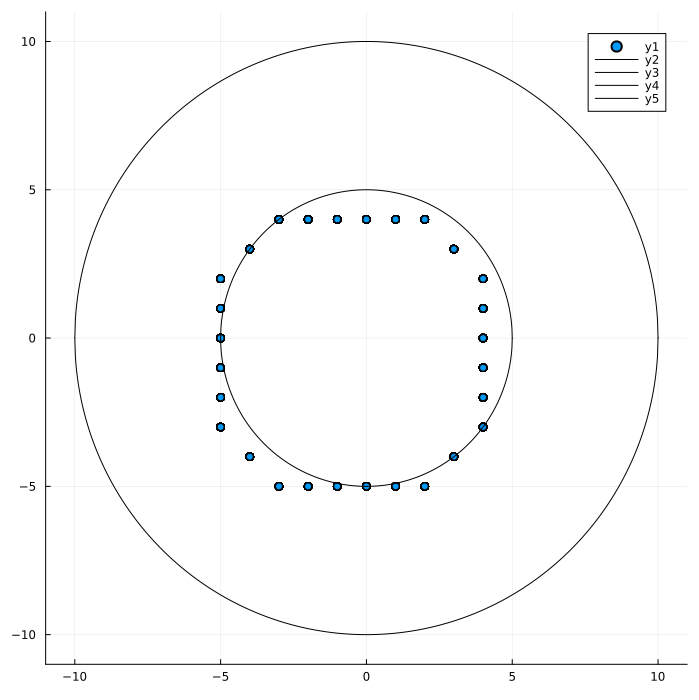

In [2]:
outer_birth_radius = 10.0
inner_birth_radius = 0.5 * outer_birth_radius
particle_number = 10000

walker_ensemble_initial_state = zeros(Float64, (2, particle_number))
for particle in 1:particle_number
    walker_ensemble_initial_state[:, particle] = Random_walker.initialize_randomwalker(inner_birth_radius)
end

#plotting inner and outer birth rings
x_inner_circle = [x for x in range(-1 * inner_birth_radius, inner_birth_radius, 1000)]
x_outer_circle = [x for x in range(-1 * outer_birth_radius, outer_birth_radius, 1000)]

y_inner_circle = (inner_birth_radius^2 .- x_inner_circle.^2).^0.5
y_outer_circle = (outer_birth_radius^2 .- x_outer_circle.^2).^0.5

scatter(walker_ensemble_initial_state[1, :], walker_ensemble_initial_state[2, :],
    xlims = (-1 * outer_birth_radius - 1, outer_birth_radius + 1), 
    ylims = (-1 * outer_birth_radius - 1, outer_birth_radius + 1), size = (700, 700))
plot!(x_inner_circle, y_inner_circle, color = "black")
plot!(x_inner_circle, (-1).* y_inner_circle, color = "black")
plot!(x_outer_circle, y_outer_circle, color = "black")
plot!(x_outer_circle, (-1).*y_outer_circle, color = "black")

#### Sample Random Walk

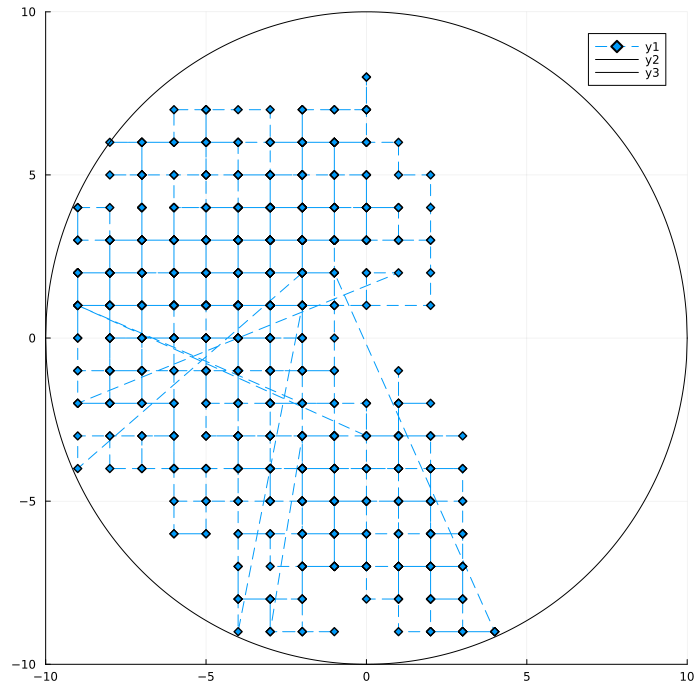

In [3]:
death_radius = 10.0
birth_radius = 0.25 * death_radius
steps = 1000

#creating data points for the death circle
x_points = [x for x in range(-1*death_radius, death_radius, 1000)]
upper_circle_boundary = (death_radius^2 .- x_points.^2).^0.5
lower_circle_boundary = (-1).*upper_circle_boundary


#creating single trajectory for the walker
walker_trajectory = Random_walker.random_walk_generator(steps, death_radius, birth_radius)


#plot of random walk to be saved
plot(walker_trajectory[1, :], walker_trajectory[2, :], xlims = (-1 * death_radius, death_radius), 
            ylims = (-1 * death_radius, death_radius), marker = :d, linestyles = :dash, size = (700, 700))
plot!(x_points, upper_circle_boundary, color = "black")
plot!(x_points, lower_circle_boundary, color = "black")
savefig("image_results/sample_randomwalk.png"); #saving plot


#plot of random walk to be shown in the notebook
plot(walker_trajectory[1, :], walker_trajectory[2, :], xlims = (-1 * death_radius, death_radius), 
            ylims = (-1 * death_radius, death_radius), marker = :d, linestyles = :dash, size = (700, 700))
plot!(x_points, upper_circle_boundary, color = "black")
plot!(x_points, lower_circle_boundary, color = "black")


#### Sample Cluster for $p = 1.0$

In [4]:
particle_number = 1500
maximum_radius = 100.0
sticking_prob = 1.0

@time cluster_aggregate = Random_walker.serialized_dla(particle_number, maximum_radius, sticking_prob);
writedlm("raw_data/cluster aggregate for p = $sticking_prob.txt", cluster_aggregate)

 Walker # 1500 done! 23.008243 seconds (1.20 G allocations: 126.343 GiB, 11.75% gc time, 0.01% compilation time)


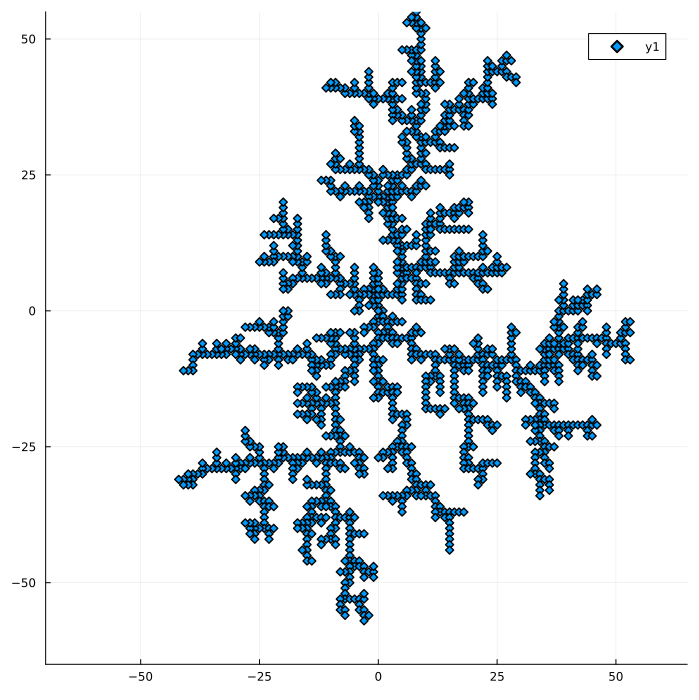

In [5]:
sticking_prob = 1.0
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-70, 65), 
            ylims = (-65, 55), size = (700, 700), marker = :diamond )

savefig("image_results/sample cluster aggregate.png")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-70, 65), 
            ylims = (-65, 55), size = (700, 700), marker = :diamond )

#### Sample Cluster for $p = 0.5$

In [6]:
particle_number = 1500
maximum_radius = 100.0
sticking_prob = 0.5

@time cluster_aggregate = Random_walker.serialized_dla(particle_number, maximum_radius, sticking_prob)
writedlm("raw_data/cluster aggregate for p = $sticking_prob.txt", cluster_aggregate)

 Walker # 1500 done! 44.416323 seconds (2.18 G allocations: 231.464 GiB, 12.36% gc time)


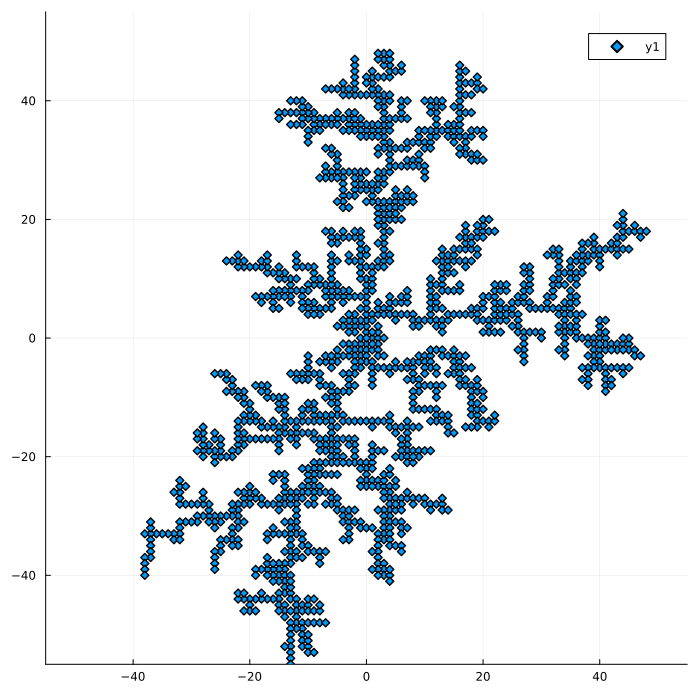

In [7]:
figure_lim = 55
sticking_prob = 0.5
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-1*figure_lim, figure_lim), 
            ylims = (-1*figure_lim, figure_lim), size = (700, 700), marker = :diamond )

savefig("image_results/sample cluster aggregate for p = $sticking_prob.png")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-1*figure_lim, figure_lim), 
            ylims = (-1*figure_lim, figure_lim), size = (700, 700), marker = :diamond )

#### Sample Cluster for p = 0.25

In [8]:
particle_number = 1500
maximum_radius = 100.0
sticking_prob = 0.25

@time cluster_aggregate = Random_walker.serialized_dla(particle_number, maximum_radius, sticking_prob)
writedlm("raw_data/cluster aggregate for p = $sticking_prob.txt", cluster_aggregate)

 Walker # 1500 done! 18.036038 seconds (854.46 M allocations: 88.661 GiB, 13.64% gc time)


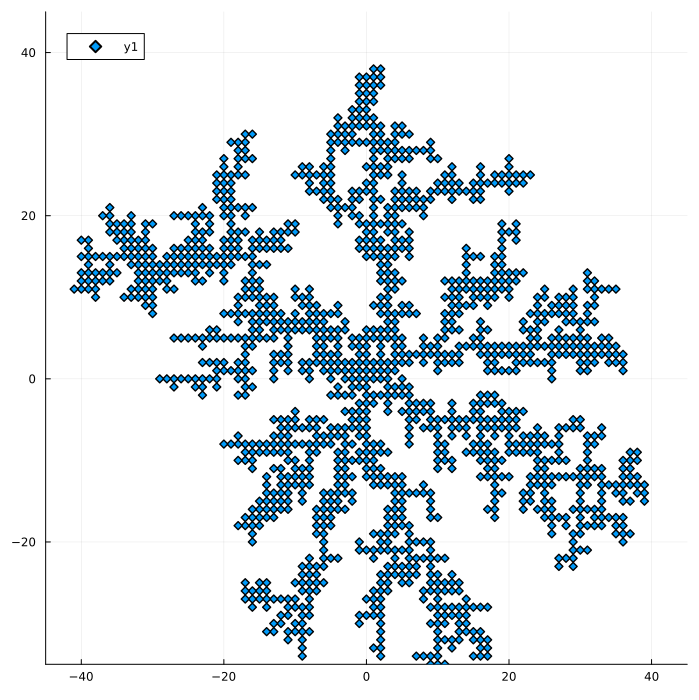

In [9]:
sticking_prob = 0.25
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-45, 45), 
            ylims = (-35, 45), size = (700, 700), marker = :diamond )

savefig("image_results/sample cluster aggregate for p = $sticking_prob.png")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-45, 45), 
            ylims = (-35, 45), size = (700, 700), marker = :diamond )

#### Sample Cluster for $p = 0.1$

In [10]:
particle_number = 1500
maximum_radius = 100.0
sticking_prob = 0.1

@time cluster_aggregate = Random_walker.serialized_dla(particle_number, maximum_radius, sticking_prob)
writedlm("raw_data/cluster aggregate for p = $sticking_prob.txt", cluster_aggregate)

 Walker # 1500 done! 16.236602 seconds (773.37 M allocations: 80.381 GiB, 13.35% gc time)


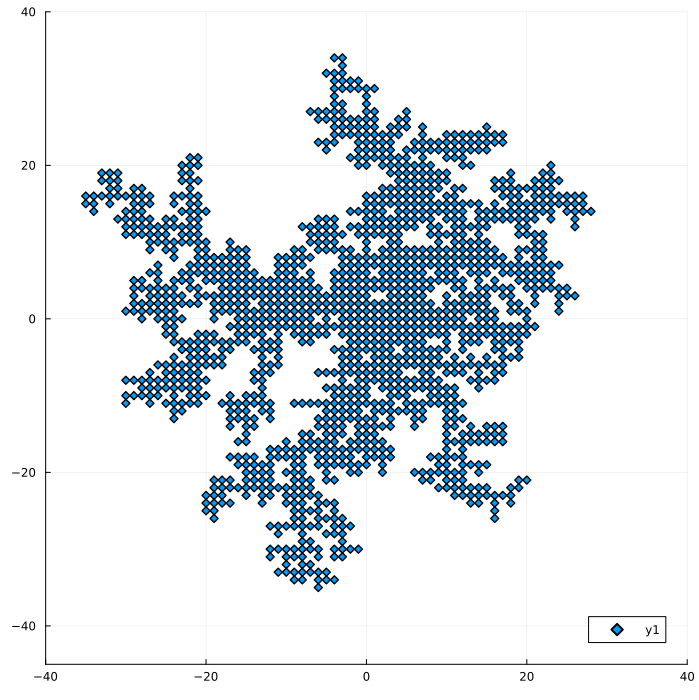

In [11]:
sticking_prob = 0.1
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-40, 40), 
            ylims = (-45, 40), size = (700, 700), marker = :diamond )

savefig("image_results/sample cluster aggregate for p = $sticking_prob.png")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-40, 40), 
            ylims = (-45, 40), size = (700, 700), marker = :diamond )

## Benchmarking Codes

#### Benchmarking for `initialize_randomwalker` function

In [12]:
birth_circle = rand(Uniform(1, 10))

@benchmark Random_walker.initialize_randomwalker($birth_circle)

BenchmarkTools.Trial: 10000 samples with 995 evaluations.
 Range (min … max):  30.361 ns …   6.103 μs  ┊ GC (min … max): 0.00% … 99.03%
 Time  (median):     33.124 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   35.595 ns ± 107.240 ns  ┊ GC (mean ± σ):  6.53% ±  2.21%

    ▁▅█▃       ▁██▆▆▁▁                                          
  ▁▃████▇▅▃▃▃▃████████▆▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  30.4 ns         Histogram: frequency by time         41.4 ns <

 Memory estimate: 80 bytes, allocs estimate: 1.

#### Benchmarking for `walker_update_position` function

In [13]:
birth_circle = rand(Uniform(1, 10))
death_circle = rand(Uniform(10, 15))

@benchmark Random_walker.walker_update_position(Random_walker.initialize_randomwalker($birth_circle), $death_circle, $birth_circle)

BenchmarkTools.Trial: 10000 samples with 973 evaluations.
 Range (min … max):  77.810 ns …   5.568 μs  ┊ GC (min … max): 0.00% … 98.25%
 Time  (median):     87.958 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   94.791 ns ± 184.355 ns  ┊ GC (mean ± σ):  8.65% ±  4.36%

     ▃▄            ▇█▂                                          
  ▁▁▄██▆▃▂▂▄▆▄▂▁▁▂▆███▅▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  77.8 ns         Histogram: frequency by time          113 ns <

 Memory estimate: 320 bytes, allocs estimate: 4.

#### Benchmarking for `random_walk_generator` function

In [14]:
step_number = 10000
death_radius = rand(Uniform(10, 15))
birth_radius = rand(Uniform(1, 10))

@benchmark Random_walker.random_walk_generator(step_number, $death_radius, $birth_radius)

BenchmarkTools.Trial: 7793 samples with 1 evaluation.
 Range (min … max):  497.209 μs …   6.687 ms  ┊ GC (min … max):  0.00% … 90.67%
 Time  (median):     570.375 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   640.683 μs ± 565.814 μs  ┊ GC (mean ± σ):  11.44% ± 11.40%

  ██▄▂                                                          ▁
  █████▇▇▆▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▄▅▆▆▅▅▅▆ █
  497 μs        Histogram: log(frequency) by time       4.63 ms <

 Memory estimate: 2.44 MiB, allocs estimate: 30038.

#### Benchmarking for `walker_distance_from_cluster` function

In [15]:
particle_number = 1500
cluster_particle_number = 1490
birth_radius = rand(Uniform(0, 20))
cluster_aggregate = rand(Uniform(0, 10), (2, particle_number))


@benchmark Random_walker.walker_distance_from_cluster($cluster_aggregate, 
        $Random_walker.initialize_randomwalker($birth_radius), cluster_particle_number)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  21.584 μs …   5.318 ms  ┊ GC (min … max):  0.00% … 99.21%
 Time  (median):     25.375 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   29.615 μs ± 132.122 μs  ┊ GC (mean ± σ):  14.01% ±  3.13%

     ▁▆▇▄▂     ▂█▆▆                                             
  ▁▂▅█████▇█▅▄▆█████▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  21.6 μs         Histogram: frequency by time         40.1 μs <

 Memory estimate: 151.94 KiB, allocs estimate: 1497.

#### Benchmarking for `cluster_distance_from_origin` function

In [16]:
particle_number = 1500
cluster_particle_number = 1490
cluster_aggregate = rand(Uniform(0, 10), (2, particle_number))

@benchmark Random_walker.cluster_distance_from_origin($cluster_aggregate, cluster_particle_number)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  21.750 μs …   5.450 ms  ┊ GC (min … max):  0.00% … 99.33%
 Time  (median):     24.917 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   29.349 μs ± 130.376 μs  ┊ GC (mean ± σ):  13.24% ±  2.97%

    ▁▇█▄▁    ▃▅▃▁                                               
  ▂▄█████▇▄▅▇████▆▅▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂▂ ▃
  21.8 μs         Histogram: frequency by time         42.8 μs <

 Memory estimate: 151.83 KiB, allocs estimate: 1493.

## Plotting Elapsed Time

In [53]:
maximum_radius = 100.0
sticking_prob = 1.0
N_points = 1

particle_number = 5000
serial_time = time_complexity.run_time(particle_number,maximum_radius,sticking_prob, N_points)
writedlm("raw_data/serial_time for up to particle_number = $particle_number.txt", serial_time)

 Walker # 5000 done!

In [54]:
serial_run_time = zeros(10,4)
for i = 500:500:5000
    particle_number = i
    serial_time = readdlm("raw_data/serial_time for up to particle_number = $particle_number.txt")
    writedlm("raw_data/serial_time for up to particle_number = $particle_number.txt", serial_time)
    j = Int(i/500)
    serial_run_time[j,:] = serial_time
end

serial_run_time_stats = time_complexity.run_time_stats(serial_run_time)

10×3 Matrix{Float64}:
  500.0    1.21091    0.460901
 1000.0   10.273      1.74755
 1500.0   40.4775    23.0147
 2000.0   74.8837    10.1176
 2500.0  135.924     33.6169
 3000.0  117.953     50.0148
 3500.0  186.419     57.6462
 4000.0  183.62      63.1646
 4500.0  304.239    185.3
 5000.0  275.566      6.57645

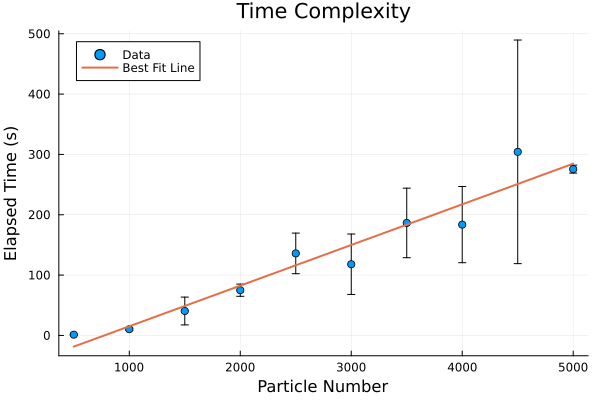

In [55]:
x_stats = serial_run_time_stats[:,1]
y_stats = serial_run_time_stats[:,2]
se = serial_run_time_stats[:,3]
data = DataFrame(x = x_stats, y = y_stats)
model = lm(@formula(y ~ x), data)
intercept, slope = coef(model)

y_best = intercept .+ slope .* x_stats
scatter(x_stats, y_stats, yerror=se, label = "Data", xlabel = "Particle Number", ylabel = "Elapsed Time (s)", title = "Time Complexity")
plot!(x_stats, y_best, label = "Best Fit Line", lw = 2)

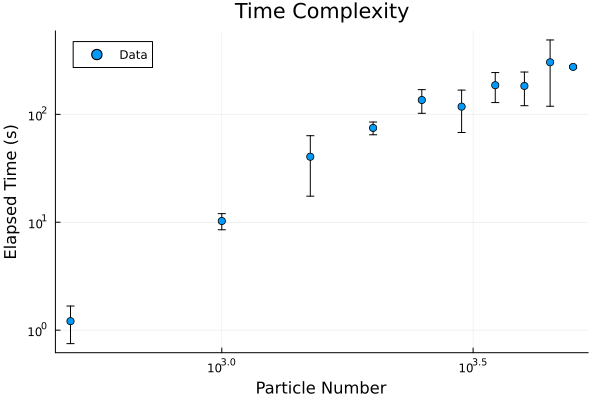

In [56]:
x_stats = (serial_run_time_stats[:,1])
y_stats = (serial_run_time_stats[:,2])
se = (serial_run_time_stats[:,3])
y_best = intercept .+ slope .* x_stats
scatter(x_stats, y_stats, yerror=se, label = "Data", 
        xaxis=:log, yaxis=:log,
        xlabel = "Particle Number", ylabel = "Elapsed Time (s)", 
        title = "Time Complexity")

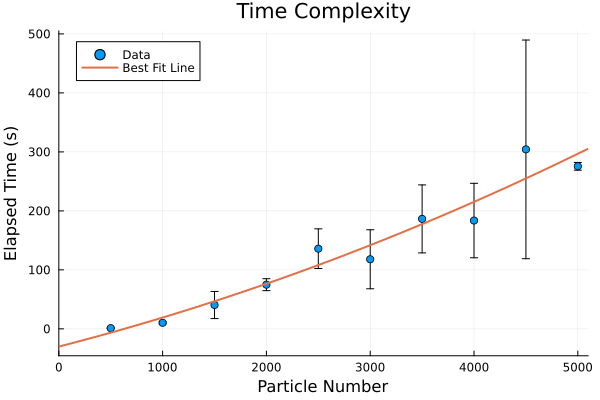

In [57]:
y_best = Polynomials.fit(x_stats,y_stats,2)
scatter(x_stats, y_stats, yerror=se, label = "Data", 
        xlabel = "Particle Number", ylabel = "Elapsed Time (s)", 
        title = "Time Complexity")
plot!(y_best, label = "Best Fit Line", xlims=[0,5100], lw = 2)